## 1. Importacion de librerias y de informacion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_games= pd.read_csv('/datasets/games.csv') #Cargar documento

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2. Preparación de datos

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se nota que hay algunos valores faltantes y que la columna de Year_of_Release se tiene que cambiar de float a int porque los años no tienen decimales y tambien cambiaremos User_Score ya que deberia estar como numero no como obj

Reemplazar los nombres de las columnas por minusculas para un mayor orden

In [5]:
df_games.columns = df_games.columns.str.lower()
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df_games["user_score"].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

La columna de user_score tiene un valor "tbd" el cual significa "to be determined" como no tenemos el dato cambiaremos esos valores a valores nulos para tratarlos igual

In [7]:
df_games['user_score'].replace("tbd", np.nan, inplace=True)

**Cambio de tipo de dato**

In [8]:

df_games["year_of_release"] = df_games["year_of_release"].astype("Int64") 
df_games['user_score'] = df_games['user_score'].astype(float)


df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Valores nulos**

In [9]:
100 * df_games.isna().sum()/ df_games.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Eliminaremos los valores nulos de name, year_of_realease y genre ya que es un minimo, en cambio critic_score, user_scor y rating tienen un prosentaje muy alto de valores nulos y esto si nos impacta más en los datos

In [10]:
df_games.dropna(subset = ['name','year_of_release', 'genre'], inplace = True)

In [11]:
100 * df_games.isna().sum()/ df_games.shape[0]

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

**Calculo de ventas totales**

In [12]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


 ## 3. Analisis de datos

**Juegos lanzados en los diferentes años**

<AxesSubplot:xlabel='year_of_release'>

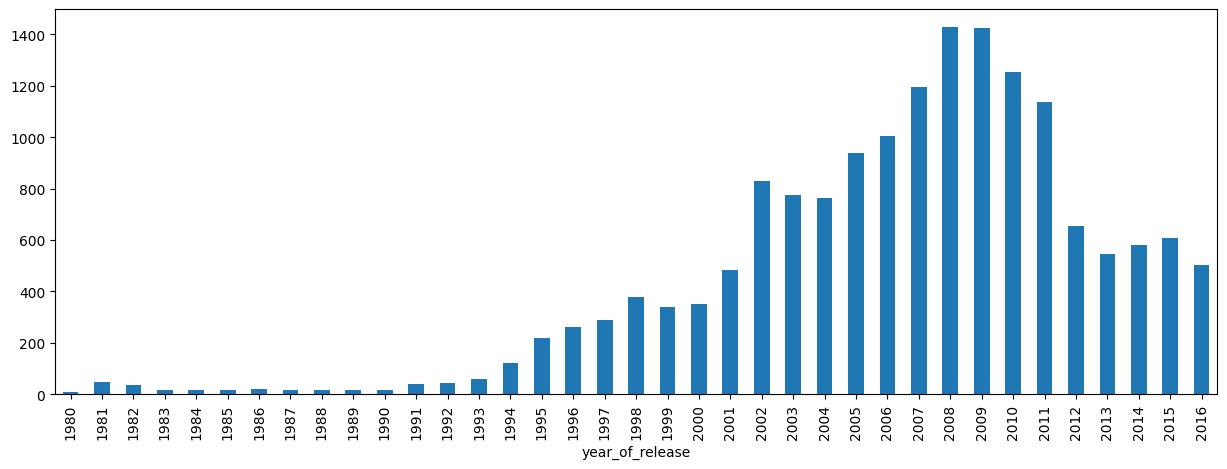

In [13]:
df_games.groupby(by='year_of_release')['name'].count().plot(kind = 'bar', figsize=(15,5))

Los datos mas significativos son los datos del 2002 en adelante que fue cuando el pik de ventas crecio más

**Ventas entre plataformas**

<AxesSubplot:title={'center':'Ventas de cada plataforma'}, xlabel='platform', ylabel='ventas'>

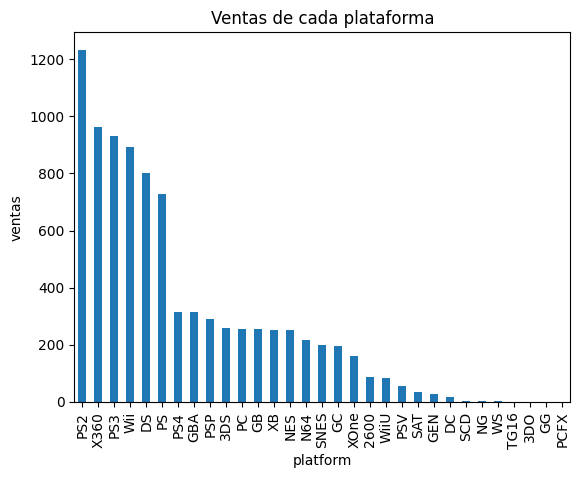

In [14]:
df_games.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', ylabel='ventas' ,title='Ventas de cada plataforma')

Podemos observar que la plataforma que más se vendio fue el PS2, seguidos estan el X360, PS3 y el Wii

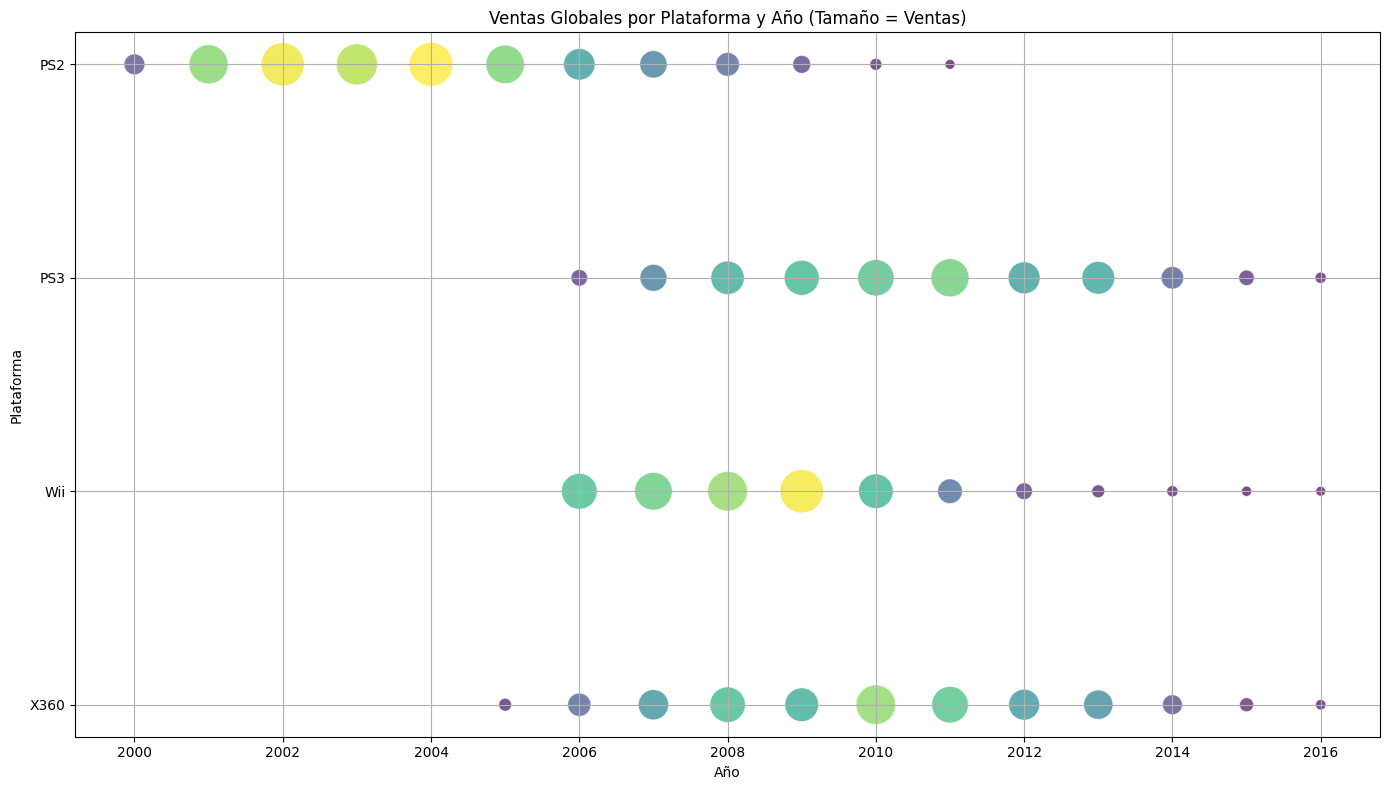

In [15]:

plataformas_deseadas = ['PS2', 'X360', 'PS3', 'Wii']
data_filtrada_b = df_games[df_games['platform'].isin(plataformas_deseadas)]


data_burbujas = data_filtrada_b.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()


plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=data_burbujas,
    x='year_of_release',
    y='platform',
    size='total_sales',
    hue='total_sales',
    sizes=(50, 1000),
    palette='viridis',
    alpha=0.7,
    legend=False
)

plt.title('Ventas Globales por Plataforma y Año (Tamaño = Ventas)')
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.grid(True)
plt.tight_layout()
plt.show()


Las consolas más populares, como PS2, PS3, Wii y Xbox 360, duran entre 9 y 15 años vendiendo juegos.
Cuando aparece una consola nueva, la anterior no desaparece de inmediato; conviven por algunos años.
Lo normal es que vendan más juegos entre 2 y 4 años después de que salen al mercado (ese es su mejor momento).

**Determinar periodo**

Para tener más actualizados los datos nos consentraremos en los datos del 2012 en adelante

In [16]:
df_games_filtrado = df_games[df_games['year_of_release']>= 2012]

**Plataformas lideres en ventas globales**

<AxesSubplot:title={'center':'ventas globales por plataforma'}, xlabel='platform'>

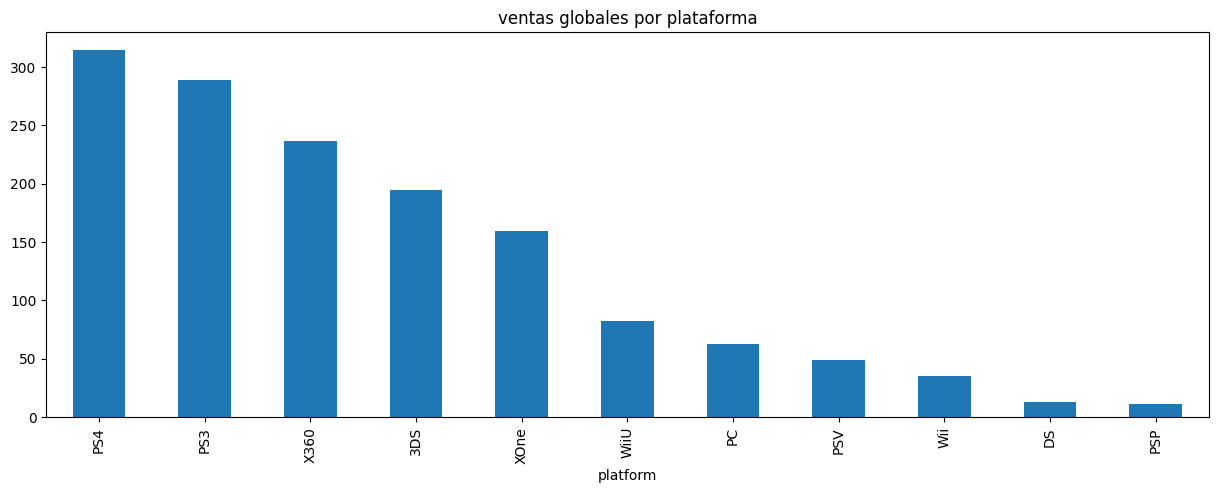

In [17]:
df_games_filtrado.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize=(15,5), title='ventas globales por plataforma')

**Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma**

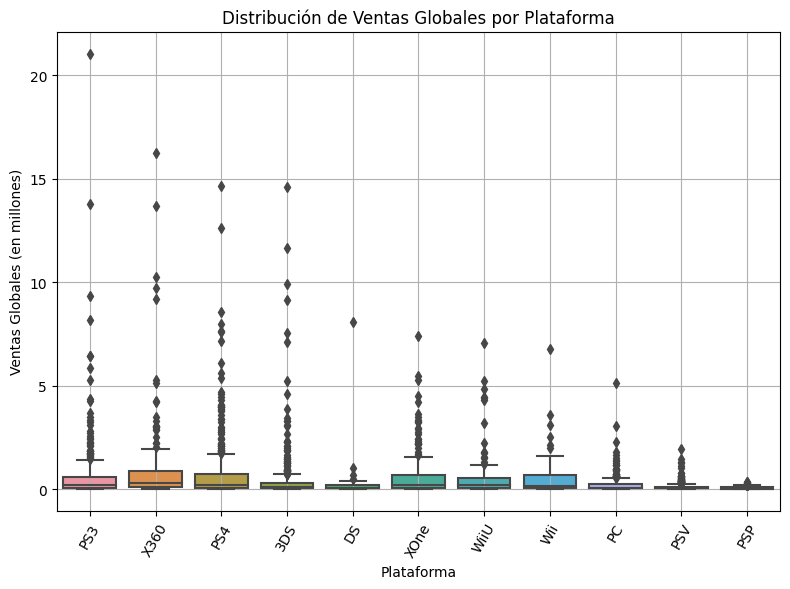

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_games_filtrado,
    x='platform',
    y='total_sales'
)
plt.xticks(rotation=60)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

La mayoría de los juegos venden poco, sin importar la consola.
Solo unas pocas plataformas tienen varios éxitos muy grandes (como X360, PS3 y Wii).
Las diferencias entre plataformas existen, pero se deben más al número de “juegos estrella” que a ventas consistentes en todos los títulos.
En promedio, todas las consolas tienen ventas bajas, y los grandes ingresos vienen de unos pocos juegos muy vendidos.

**Gráfico de dispersión entre las reseñas y las ventas**

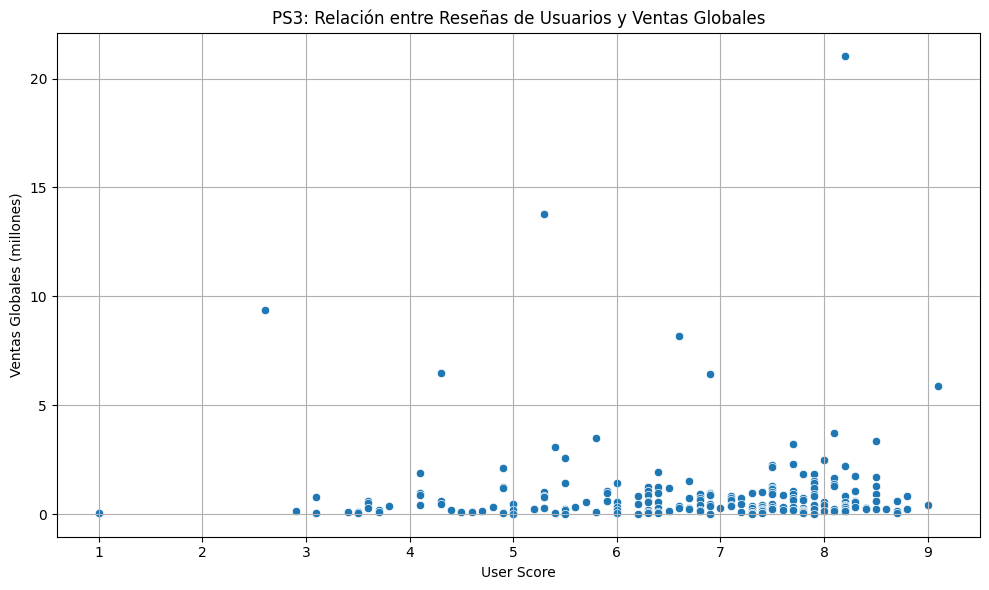

In [19]:

PS3_df = df_games_filtrado[df_games_filtrado['platform'] == 'PS3']


PS3_df = PS3_df.dropna(subset=['user_score', 'critic_score', 'total_sales'])


PS3_df['user_score'] = pd.to_numeric(PS3_df['user_score'], errors='coerce')
PS3_df = PS3_df.dropna(subset=['user_score'])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=PS3_df, x='user_score', y='total_sales')
plt.title('PS3: Relación entre Reseñas de Usuarios y Ventas Globales')
plt.xlabel('User Score')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

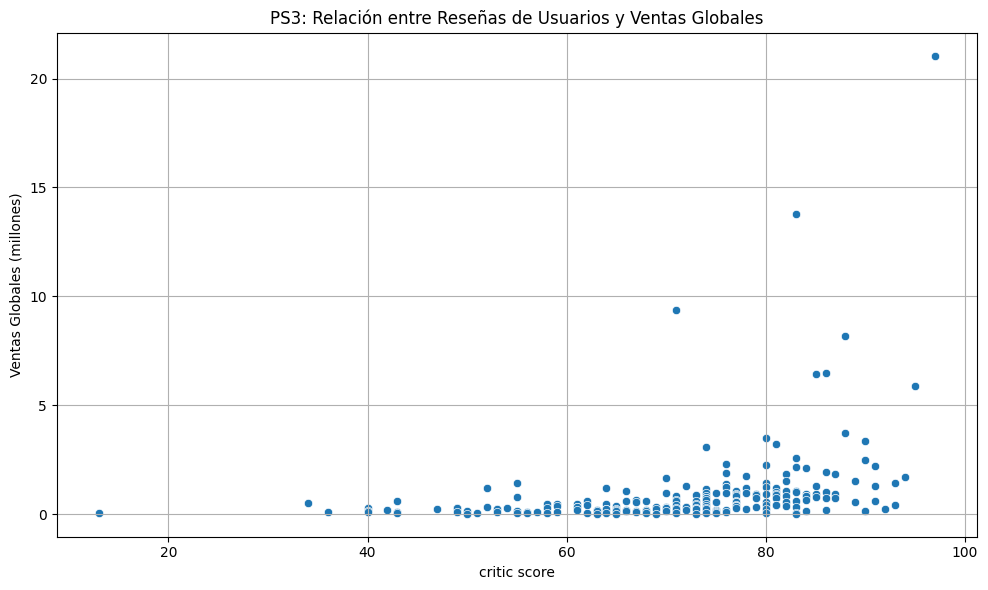

In [20]:
PS3_df = df_games_filtrado[df_games_filtrado['platform'] == 'PS3']


PS3_df = PS3_df.dropna(subset=['user_score', 'critic_score', 'total_sales'])


PS3_df['critic_score'] = pd.to_numeric(PS3_df['critic_score'], errors='coerce')
PS3_df = PS3_df.dropna(subset=['critic_score'])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=PS3_df, x='critic_score', y='total_sales')
plt.title('PS3: Relación entre Reseñas de Usuarios y Ventas Globales')
plt.xlabel('critic score')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
correlacion_user = PS3_df['user_score'].corr(PS3_df['total_sales'])
correlacion_critic = PS3_df['critic_score'].corr(PS3_df['total_sales'])

print(f"Correlación entre user_score y ventas: {correlacion_user:.2f}")
print(f"Correlación entre critic_score y ventas: {correlacion_critic:.2f}")

Correlación entre user_score y ventas: 0.00
Correlación entre critic_score y ventas: 0.33


Se puede decir que no hay corelacion entre user score y ventas, pero si un poco entre la critic score y las ventas

**Comparacion de juegos en cada plataforma**

In [22]:
# Filtrar juegos que están en más de una plataforma
multi_platform_games = df_games_filtrado.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# Filtrar solo esos juegos
df_multi = df_games_filtrado[df_games['name'].isin(multi_platform_games)]

# Elegir solo algunas plataformas para comparación
plataformas_interes = ['Wii', 'PS3', 'X360', 'PS2']
df_multi = df_multi[df_multi['platform'].isin(plataformas_interes)]

# Pivotear para que cada fila sea un juego y las columnas sean las plataformas
pivot_df = df_multi.pivot_table(
    index='name',
    columns='platform',
    values='total_sales'
)

# Eliminar filas con muchos NaNs
pivot_df = pivot_df.dropna(thresh=3)  # Al menos dos plataformas por juego

# Mostrar comparación de ventas
print(pivot_df.tail())

platform                                   PS3   Wii  X360
name                                                      
The Amazing Spider-Man (Console Version)  0.79  0.15  0.73
The Smurfs 2                              0.10  0.10  0.12
Turbo: Super Stunt Squad                  0.01  0.01  0.01
WWE '13                                   1.36  0.14  1.27
Young Justice: Legacy                     0.09  0.03  0.01


/tmp/ipykernel_200/2322062435.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_multi = df_games_filtrado[df_games['name'].isin(multi_platform_games)]


<AxesSubplot:xlabel='name', ylabel='total sale'>

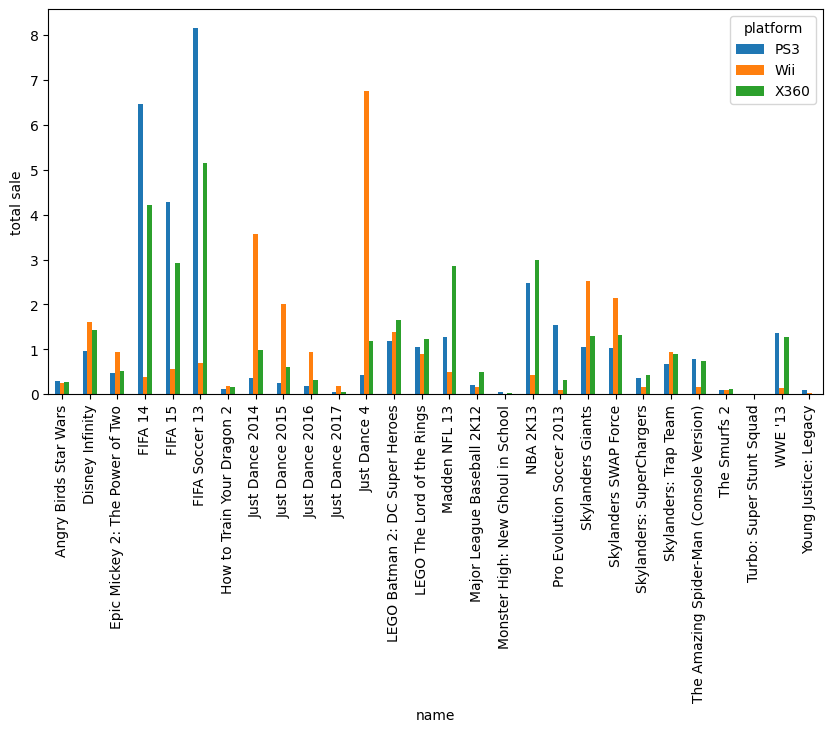

In [23]:
pivot_df.plot(kind = 'bar', ylabel = 'total sale',figsize=(10,5), rot = 90)

Si hay ciertos juegos que fueron más vendidos en ciertas plataformas por ejemplo el fifca soccer 13 en el PS3 y just dance 2017 en el wii, hay pocos juegos que se venden igual por consola

**Juegos por genero**

<AxesSubplot:xlabel='genre', ylabel='total sale'>

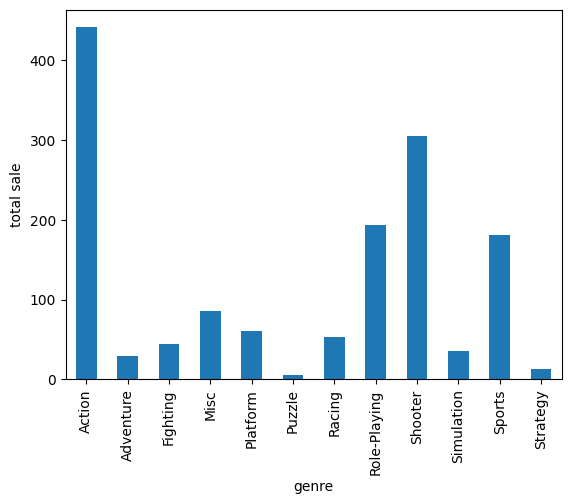

In [24]:
df_games_filtrado.groupby('genre')['total_sales'].sum().plot(kind = 'bar', ylabel = 'total sale')

Los jugos de genero más vendido son los de acción seguido y el que menos ventas tiene son los juegos de rompecabezas

## 4. Perfil de ususario para cada región

<AxesSubplot:title={'center':'VENTAS POR PLATAFORMA SEGUN LA REGION'}, xlabel='platform', ylabel='Sales'>

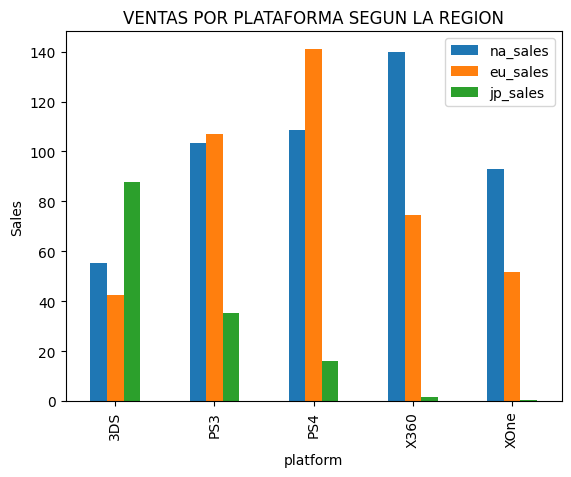

In [25]:
plataformas_deseadas = ['PS4', 'XOne', 'X360', "PS3", "3DS"]

df_filtrado = df_games_filtrado[df_games_filtrado['platform'].isin(plataformas_deseadas)]

df_filtrado.groupby("platform")[["na_sales", "eu_sales", "jp_sales"]].sum().plot(
    kind='bar',
    ylabel='Sales',
    title ='VENTAS POR PLATAFORMA SEGUN LA REGION'
)

Se puede observar como ciertas plataformas fueron más exitosas en ciertas regiones como el xbox en Norte America, el PS en Europa y DS en Japon

<AxesSubplot:title={'center':'VENTAS POR GENERO SEGUN LA REGION'}, xlabel='genre', ylabel='Sales'>

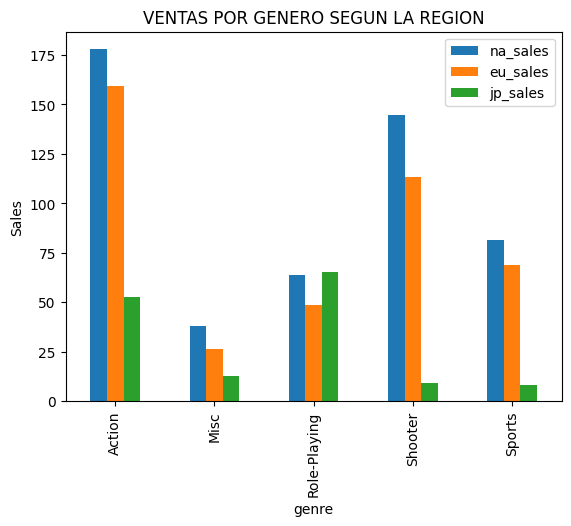

In [26]:
genre_deseadas = ['Action', 'Role-Playing', 'Shooter', "Sports", "Misc"]

df_filtrado = df_games_filtrado[df_games_filtrado['genre'].isin(genre_deseadas)]

df_filtrado.groupby("genre")[["na_sales", "eu_sales", "jp_sales"]].sum().plot(
    kind='bar',
    ylabel='Sales',
    title ='VENTAS POR GENERO SEGUN LA REGION'
)

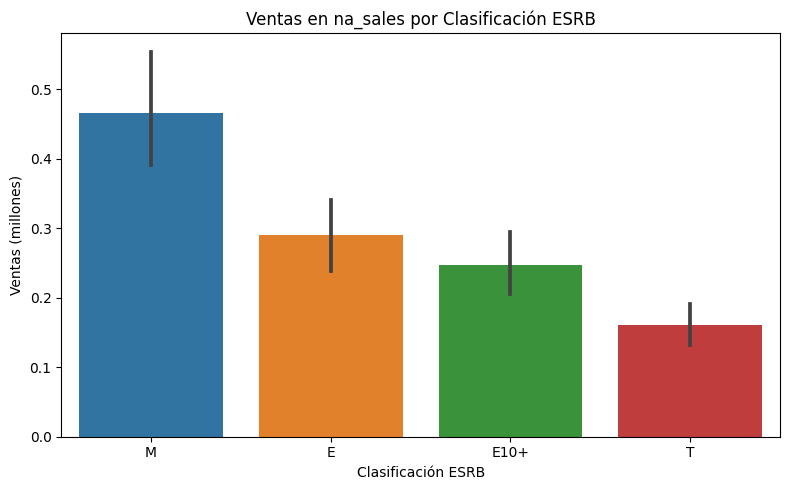

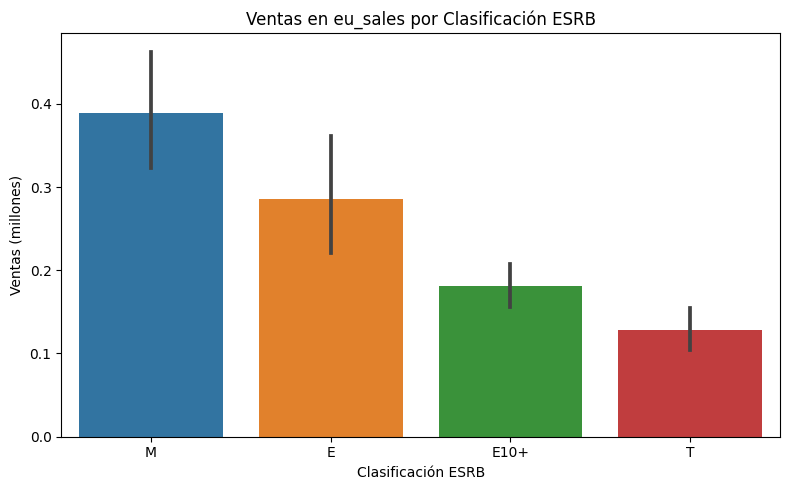

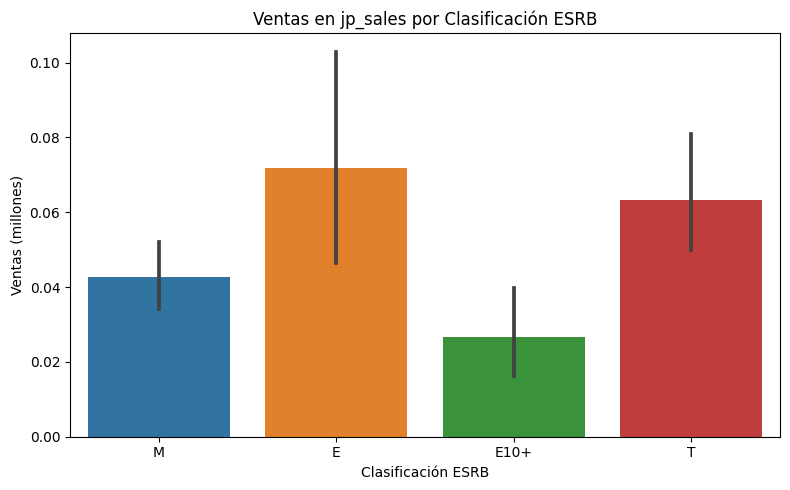

In [27]:
regiones = ['na_sales', 'eu_sales', 'jp_sales']

for region in regiones:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_games_filtrado, x='rating', y=region)
    plt.title(f'Ventas en {region} por Clasificación ESRB')
    plt.xlabel('Clasificación ESRB')
    plt.ylabel('Ventas (millones)')
    plt.tight_layout()
    plt.show()

Si afectan, al parecer en japon los juegos con mas ventas son los de clasificación E y T, mientras que en Norte America y Europa se van más por la clasificación M y E.
Se podria decir entonces que tanto en Norte America y Europa se vende más juegos para adultos (17 en adelante) y en japon se venden juegos más para todo el publico y para adolocentes.

## 5. Prueba de hipotesis

Eliminiar valores atípicos

In [29]:
Q1 = df_games_filtrado['user_score'].quantile(0.25)
Q3 = df_games_filtrado['user_score'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame
df_games_filtrado = df_games_filtrado[(df_games_filtrado['user_score'] >= limite_inferior) & (df_games_filtrado['user_score'] <= limite_superior)]


**Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

Ho: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [31]:
xone_score = df_games_filtrado[df_games_filtrado['platform'] == 'XOne']['user_score'].dropna()
pc_score = df_games_filtrado[df_games_filtrado['platform'] == 'PC']['user_score'].dropna()

In [35]:
from scipy.stats import levene, ttest_ind


p_levene = levene(xone_score, pc_score).pvalue
print(f'P-valor de Levene: {p_levene}')


equal_var = p_levene > 0.05


t_stat, p_valor = ttest_ind(xone_score, pc_score, equal_var=equal_var)
print(f'P-valor t-test: {p_valor}')

# Interpretación
alpha = 0.05
if p_valor < alpha:
    print('Rechazamos la hipótesis nula: las medias son diferentes.')
else:
    print('No rechazamos la hipótesis nula: las medias podrían ser iguales.')


P-valor de Levene: 0.0329894393370718
P-valor t-test: 0.9342301338581691
No rechazamos la hipótesis nula: las medias podrían ser iguales.


Aunque las varianzas entre Xbox One y PC son diferentes, no se encontró una diferencia significativa en las calificaciones promedio. Por lo tanto, se concluye que las calificaciones promedio podrían ser iguales en ambas plataformas.

**Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

Ho:  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

H1:  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [33]:
accion_score = df_games_filtrado[df_games_filtrado['genre'] == 'Action']['user_score'].dropna()
deportes_score = df_games_filtrado[df_games_filtrado['genre'] == 'Sports']['user_score'].dropna()

In [37]:
from scipy.stats import levene, ttest_ind


p_levene = levene(accion_score, deportes_score).pvalue
print(f'P-valor de Levene: {p_levene}')


equal_var = p_levene > 0.05  

t_stat, p_valor = ttest_ind(accion_score, deportes_score, equal_var=equal_var)
print(f'P-valor del t-test: {p_valor}')

alpha = 0.05
if p_valor < alpha:
    print('Rechazamos la hipótesis nula: las calificaciones promedio SON diferentes.')
else:
    print('No rechazamos la hipótesis nula: las calificaciones promedio podrían ser iguales.')


P-valor de Levene: 0.006785022805255659
P-valor del t-test: 2.457532763430183e-18
Rechazamos la hipótesis nula: las calificaciones promedio SON diferentes.


Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son significativamente diferentes. Este resultado indica que el género del juego sí tiene un impacto importante en cómo los usuarios valoran los juegos.

## 6. Conclusión

En los datos pudimos ver que las ventas y calificaciones de los juegos cambian según la región. Algunos juegos y consolas fueron más exitosos en ciertas partes del mundo que en otras.

También notamos que el género del juego sí tiene un impacto. Por ejemplo, los juegos de acción tienen mejores resultados en Norteamérica y Europa, mientras que en Japón son más populares los juegos de rol.

Además, la clasificación ESRB también parece influir. En Norteamérica y Europa, los juegos con clasificación "M" (para adultos) tienden a tener mejores ventas, mientras que en Japón los juegos con clasificación "E" (para todos) son más populares.

Con esto en mente, yo recomendaría enfocarse en:

Juegos de acción con clasificación M para el mercado occidental, y Juegos de rol con clasificación E para el público japonés,

ya que son las combinaciones que mejor funcionan en cada región.